In [ ]:
!pip install bing-image-downloader

In [ ]:
import numpy as np
import pandas as pd
import os
import cv2
import math
import matplotlib.pyplot as plt
import matplotlib.image as image
from google.colab.patches import cv2_imshow
from bing_image_downloader import downloader
import time
from matplotlib import pyplot as plt

In [ ]:
img = np.zeros((256,256,3),np.uint8)
img[:,:,2]=255*np.ones((256,256),np.uint8) #Red
# img[:,:,1]=255*np.ones((256,256),np.uint8) #Green
# img[:,:,0]=255*np.ones((256,256),np.uint8) #Blue

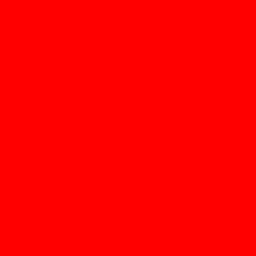

In [ ]:
cv2_imshow(img)

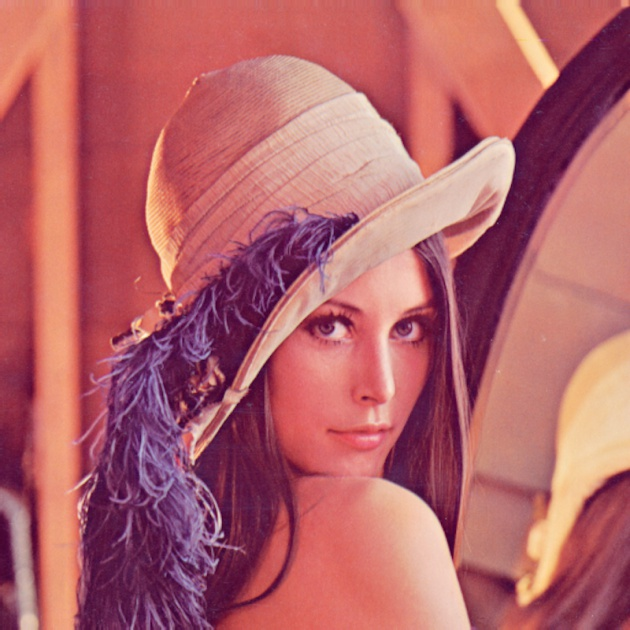

In [ ]:
img = cv2.imread('lena.jpg')
cv2_imshow(img)

Red Channel


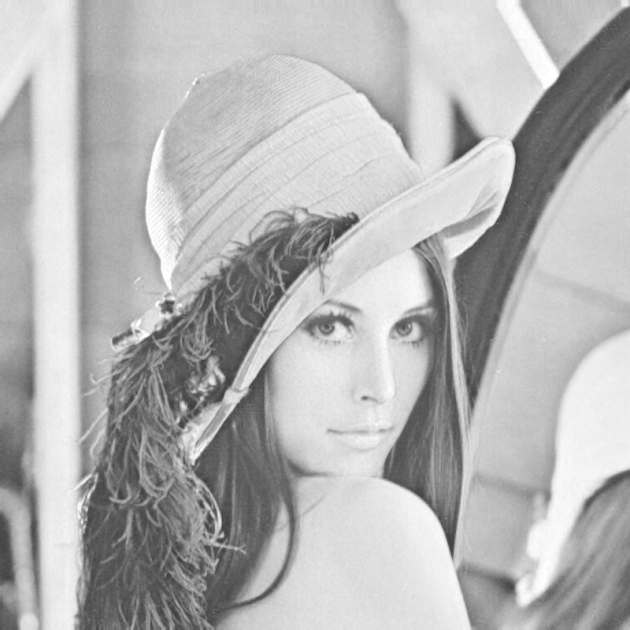

Green Channel


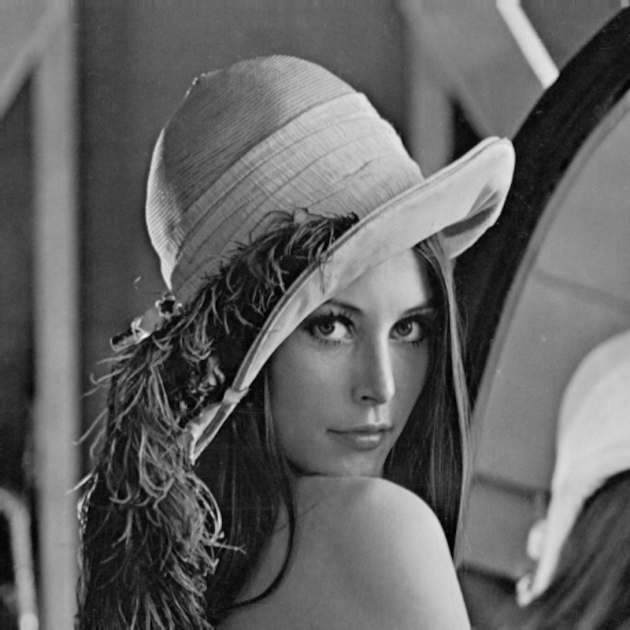

Blue Channel


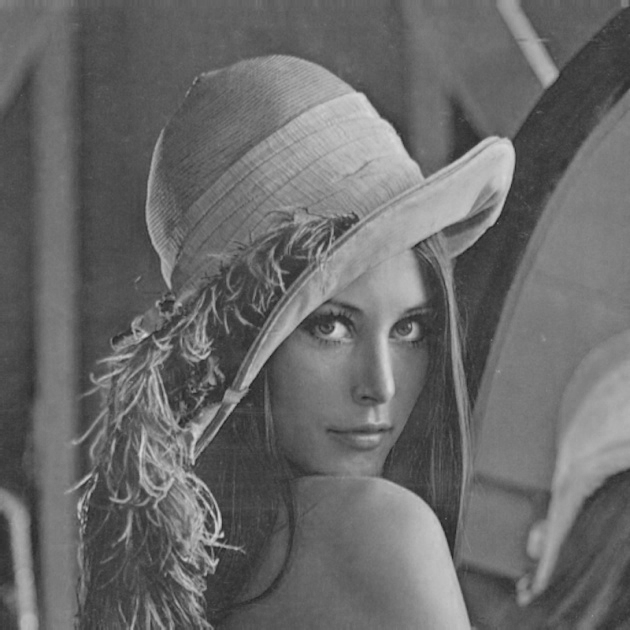

In [ ]:
print('Red Channel')
redChannel=img[:,:,2]
cv2_imshow(redChannel)

print('Green Channel')
greenChannel=img[:,:,1]
cv2_imshow(greenChannel)

print('Blue Channel')
blueChannel=img[:,:,0]
cv2_imshow(blueChannel)

In [ ]:
np.mean(redChannel)

105.5179617031998

# Sort Images

## Get images

In [ ]:
!mkdir images

In [ ]:
!rm -r 'images/cars'

In [ ]:
downloader.download("cars", limit=200, output_dir="images")

[%] Downloading Images to /content/images/cars


[!!]Indexing page: 1

[%] Indexed 150 Images on Page 1.


[%] Downloading Image #1 from https://i.pinimg.com/originals/78/48/bd/7848bde96759413c7ab936584b9c5fe8.jpg
[%] File Downloaded !

[%] Downloading Image #2 from http://dmi3w0goirzgw.cloudfront.net/gallery-images/1600/406000/600/406638.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://media.whatcar.com/wc-image/2019-05/15-14-1-kia-picanto-review-hero-front.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://i.pinimg.com/originals/4b/cc/60/4bcc60ef5497f1ac8fddb4b88dc31b5f.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://ccnwordpress.blob.core.windows.net/journal/2018/05/20180507_100831.jpg
[%] File Downloaded !

[%] Downloading Image #6 from https://external-preview.redd.it/pbEfLIYe90hFmJFBXWG8K0oXU4ayUl-6-USZlF7G_qk.jpg?auto=webp&amp;s=b2d9b17a5a84826506058e26ddbaeead84d0761a
[!] Issue getting: https://external-preview.redd.it/pbEfLIYe90hF

## Sorting

### Functions

In [ ]:
def image_to_number(url):
  img = cv2.imread(url)
  # Channels
  redChannel=img[:,:,2]
  greenChannel=img[:,:,1]
  blueChannel=img[:,:,0]

  number = np.mean((np.mean(redChannel), np.mean(greenChannel), np.mean(blueChannel)))
  #number = (np.mean(redChannel)*0.3) + (np.mean(greenChannel)*0.4) + (np.mean(blueChannel)*0.3)

  # Formula to determine perceived brightness of RGB color 
  # https://stackoverflow.com/questions/596216/formula-to-determine-perceived-brightness-of-rgb-color

  #number = (np.mean(redChannel)*0.2126) + (np.mean(greenChannel)*0.7152) + (np.mean(blueChannel)*0.0722)
  #number = (np.mean(redChannel)*0.299) + (np.mean(greenChannel)*0.587) + (np.mean(blueChannel)*0.114)
  
  return number

In [ ]:
def sort_images(directory_arr):
  n = len(directory_arr)
  new_array = np.zeros(n)

  df = pd.DataFrame()
  df['image'] = directory_arr
  df['value'] = new_array
  for i in range(len(df)):
    df['value'][i] = image_to_number(df['image'][i])
  
  return df.sort_values(by='value')

In [ ]:
def resize(img):
  height = 20
  scale_percent = height/img.shape[0]
  width = int(img.shape[1] * scale_percent)
  dsize = (width, height)
  output = cv2.resize(img, dsize)
  return output

In [ ]:
def plot_images(list_urls):
  # definimos el numero de columnas y filas
  columnas = 20
  n = len(list_urls)
  filas = math.ceil(n/columnas)
  x=0
  for i in range(filas):
    array = []
    for j in range(columnas):
      if(x==n):
        break
      else:
        array.append(resize(cv2.imread(list_urls[x])))
        x=x+1
    Hori = np.concatenate(array, axis=1)
    cv2_imshow(Hori)
    if(x==n):
      break

### Code

In [ ]:
path = 'images/cars/'

directory_contents = os.listdir(path)
directory_arr = [path+i for i in directory_contents] 
print(directory_arr)

['images/cars/Image_85.jpg', 'images/cars/Image_22.jpg', 'images/cars/Image_127.jpg', 'images/cars/Image_137.jpg', 'images/cars/Image_172.jpg', 'images/cars/Image_56.jpg', 'images/cars/Image_155.jpg', 'images/cars/Image_150.jpg', 'images/cars/Image_99.jpg', 'images/cars/Image_36.jpg', 'images/cars/Image_179.jpg', 'images/cars/Image_16.jpg', 'images/cars/Image_25.JPG', 'images/cars/Image_49.jpg', 'images/cars/Image_110.jpg', 'images/cars/Image_147.jpg', 'images/cars/Image_113.jpg', 'images/cars/Image_132.jpg', 'images/cars/Image_146.jpg', 'images/cars/Image_109.jpg', 'images/cars/Image_80.jpg', 'images/cars/Image_60.jpg', 'images/cars/Image_185.jpg', 'images/cars/Image_78.jpg', 'images/cars/Image_200.jpg', 'images/cars/Image_92.jpg', 'images/cars/Image_124.jpg', 'images/cars/Image_139.jpg', 'images/cars/Image_119.jpg', 'images/cars/Image_12.jpg', 'images/cars/Image_103.jpg', 'images/cars/Image_173.jpg', 'images/cars/Image_21.jpg', 'images/cars/Image_177.jpg', 'images/cars/Image_15.jpg',

In [ ]:
ordered_images = sort_images(directory_arr)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


Original order

In [ ]:
plot_images(directory_arr)

Media

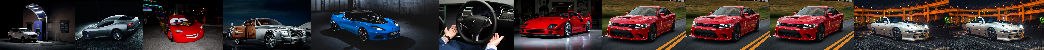

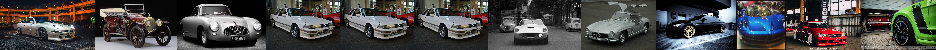

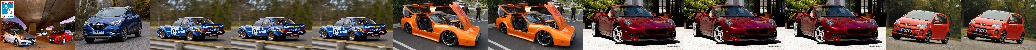

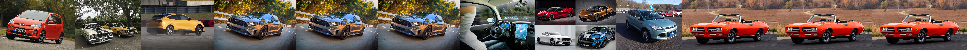

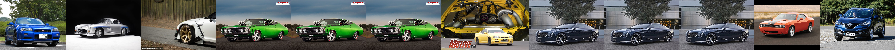

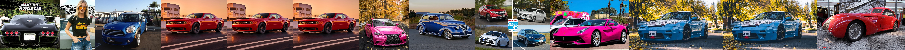

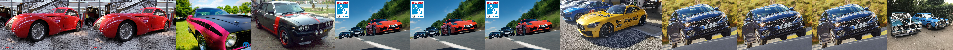

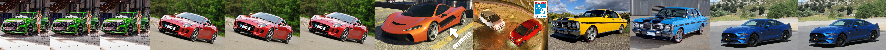

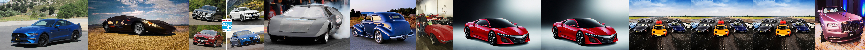

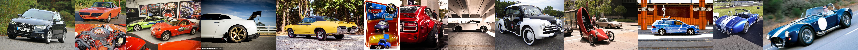

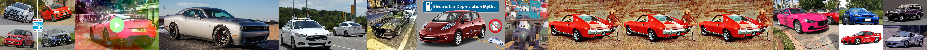

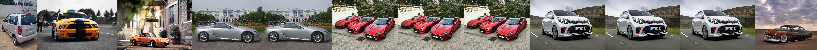

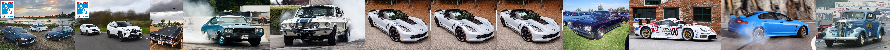

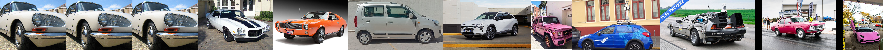

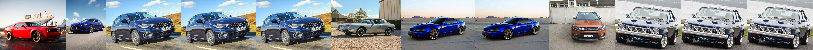

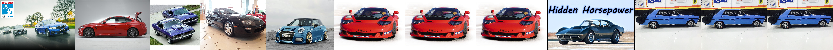

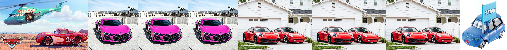

In [ ]:
plot_images(list(ordered_images['image']))

Original Order

In [ ]:
plot_images(directory_arr)

Media

In [ ]:
plot_images(list(ordered_images['image']))

Media ponderada

In [ ]:
plot_images(list(ordered_images['image']))

Formula to determine perceived brightness of RGB color

In [ ]:
plot_images(list(ordered_images['image']))

In [ ]:
plot_images(list(ordered_images['image']))

### Code

In [ ]:
downloader.download("cars", limit=20, output_dir="images")

[%] Downloading Images to /content/images/cars


[!!]Indexing page: 1

[%] Indexed 9 Images on Page 1.


[%] Downloading Image #1 from https://cdn.motor1.com/images/mgl/LBmKQ/s3/2022-mazda-rx-7-rendering.jpg
[Error]Invalid image, not saving https://cdn.motor1.com/images/mgl/LBmKQ/s3/2022-mazda-rx-7-rendering.jpg

[!] Issue getting: https://cdn.motor1.com/images/mgl/LBmKQ/s3/2022-mazda-rx-7-rendering.jpg
[!] Error:: Invalid image, not saving https://cdn.motor1.com/images/mgl/LBmKQ/s3/2022-mazda-rx-7-rendering.jpg

[%] Downloading Image #1 from https://townsquare.media/site/442/files/2015/05/mad-max-fury-road-2-mad-max-epic-road-war-at-the-heart-of-fury-road.png?w=1200&amp;h=0&amp;zc=1&amp;s=0&amp;a=t&amp;q=89
[%] File Downloaded !

[%] Downloading Image #2 from https://www.slashgear.com/wp-content/uploads/2021/01/AstroSlide-_0025_P1120191-Open-Front-BLC.jpg
[%] File Downloaded !

[%] Downloading Image #3 from http://www.hdwallpapers.in/download/assassins_creed_origins_4k_8k-1280x800.jpg

In [ ]:
path = 'images/cars/'

directory_contents = os.listdir(path)
directory_arr = [path+i for i in directory_contents] 
print(directory_arr)

['images/cars/Image_2.jpg', 'images/cars/Image_9.jpg', 'images/cars/Image_10.jpg', 'images/cars/Image_20.jpg', 'images/cars/Image_15.jpg', 'images/cars/Image_11.jpg', 'images/cars/Image_8.jpg', 'images/cars/Image_12.jpg', 'images/cars/Image_3.jpg', 'images/cars/Image_14.jpg', 'images/cars/Image_1.png', 'images/cars/Image_7.jpeg', 'images/cars/Image_13.jpg', 'images/cars/Image_17.jpg', 'images/cars/Image_16.jpg', 'images/cars/Image_19.jpg', 'images/cars/Image_4.jpg', 'images/cars/Image_5.jpg', 'images/cars/Image_18.jpg', 'images/cars/Image_6.jpg']


In [ ]:
def resizeAllImages(directory_arr):
  for x in directory_arr:
    img = cv2.imread(x)
    output = resize(img, 500)
    cv2.imwrite(x,output)

In [ ]:
resizeAllImages(directory_arr)

In [ ]:
def resize(img, height):
  # scale_percent = height/img.shape[0]
  # width = int(img.shape[1] * scale_percent)
  dsize = (height, height)
  output = cv2.resize(img, dsize)
  return output

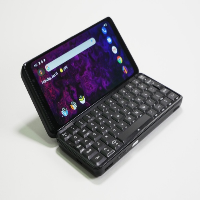

In [ ]:
url = 'images/cars/Image_2.jpg'
img = cv2.imread(url)
output = resize(img, 200)
cv2_imshow(output)

In [ ]:
def image_to_number(url):
  img = cv2.imread(url)
  # Channels
  redChannel=img[:,:,2]
  greenChannel=img[:,:,1]
  blueChannel=img[:,:,0]
 
  return (np.mean(redChannel), np.mean(greenChannel), np.mean(blueChannel))

In [ ]:
def createDf(directory_arr):
  n = len(directory_arr)
  new_array = np.zeros(n)
  df = pd.DataFrame()
  df['image'] = directory_arr
  df['r'] = new_array
  df['g'] = new_array
  df['b'] = new_array
  for i in range(len(df)):
    arr = image_to_number(df['image'][i])
    df['r'][i] = arr[0]
    df['g'][i] = arr[1]
    df['b'][i] = arr[2]
  
  return df.sort_values(by='image')

In [ ]:
imagenesConValores = createDf(directory_arr)
imagenesConValores

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


image           r           g           b
10   images/cars/Image_1.png  159.393768  149.889120  135.888428
2   images/cars/Image_10.jpg  108.531000   87.759328   60.197072
5   images/cars/Image_11.jpg   76.527604   76.072908   77.266448
7   images/cars/Image_12.jpg  133.267368  131.537400  125.229556
12  images/cars/Image_13.jpg  183.910496  176.473328  171.201444
9   images/cars/Image_14.jpg  113.592436  122.554404  135.551932
4   images/cars/Image_15.jpg  165.234492  137.598140  125.652092
14  images/cars/Image_16.jpg  131.707888  104.735496   85.984376
13  images/cars/Image_17.jpg  112.061740  110.092524   91.454828
18  images/cars/Image_18.jpg   61.267188   65.079048   57.993624
15  images/cars/Image_19.jpg  135.587452  126.462796  121.123544
0    images/cars/Image_2.jpg  171.197248  169.053216  174.546092
3   images/cars/Image_20.jpg  123.850212  130.003144  140.905988
8    images/cars/Image_3.jpg  123.739684  112.180364   92.966184
16   images/cars/Image_4.jpg  130.763248  129.213816  137.414308
17   images/cars/Image_5.jpg  114.527820  108.589516   97.077912
19   images/cars/Image_6.jpg  104.348192  102.895812  105.826080
11  images/cars/Image_7.jpeg  158.976764  111.409124   99.465660
6    images/cars/Image_8.jpg  165.065672  159.259720  153.710120
1    images/cars/Image_9.jpg  124.683016  125.693112  127.154840

In [ ]:
def selectImage(imagenesConValores, rgb):
  rgb = np.array(rgb)
  min = 500
  for i in range(len(imagenesConValores)):
    img = (imagenesConValores.iloc[i]['r'], imagenesConValores.iloc[i]['g'], imagenesConValores.iloc[i]['b'])
    img = np.array(img)
    dis = np.sqrt(np.sum((img-rgb) ** 2))
    if(dis < min):
      min = dis
      url = imagenesConValores.iloc[i]['image']
  return url

In [ ]:
selectImage(imagenesConValores, (70.0,70.0,70.0))

'images/cars/Image_11.jpg'

In [ ]:
imagen = 'images/cars/Image_10.jpg'

In [ ]:
def plot_images(imagen, cols, imagenesConValores):
  maxCols = 500
  pixels = int(maxCols / cols)
  print(pixels)
  img = cv2.imread(imagen)
  output = resize(img, cols)

  totalArray = []
  for i in range(cols):
    arrayAux = []
    for j in range(cols):
      newPixel = selectImage(imagenesConValores, (output[:,:,2][i][j], output[:,:,1][i][j], output[:,:,0][i][j]))
      arrayAux.append(resize(cv2.imread(newPixel), pixels))
    Hori = np.concatenate(arrayAux, axis=1)
    totalArray.append(Hori)
  imgTotal = np.concatenate(totalArray, axis=0)
  cv2_imshow(imgTotal)

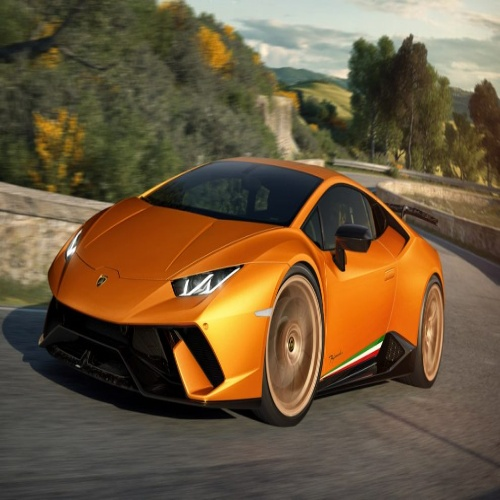

In [ ]:
img = cv2.imread(imagen)
cv2_imshow(img)

50


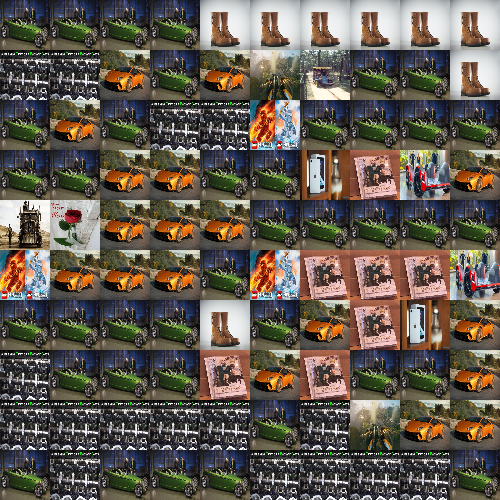

2.248110055923462


In [ ]:
inicio = time.time()
plot_images(imagen, 10, imagenesConValores)
fin = time.time()
print(fin-inicio)

25


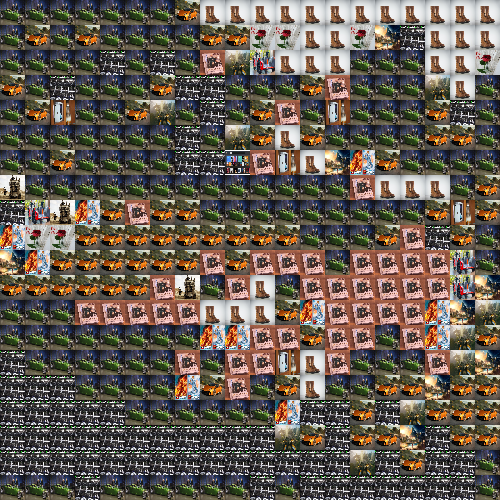

5.178588390350342


In [ ]:
inicio = time.time()
plot_images(imagen, 20, imagenesConValores)
fin = time.time()
print(fin-inicio)

10


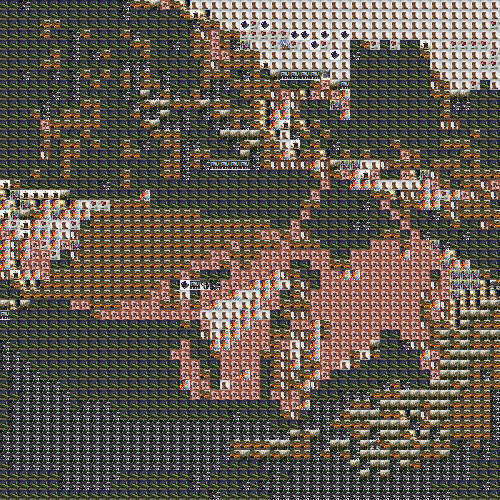

34.27704954147339


In [ ]:
inicio = time.time()
plot_images(imagen, 50, imagenesConValores)
fin = time.time()
print(fin-inicio)

5


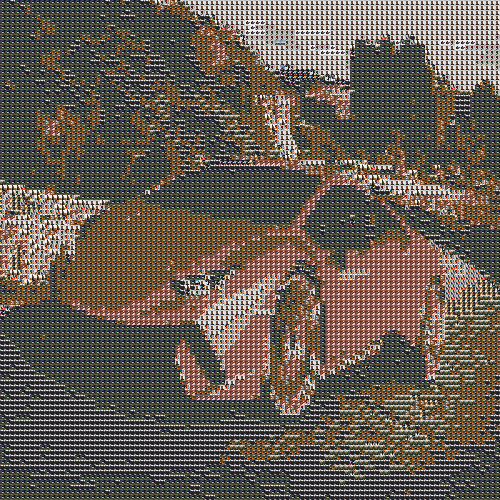

129.01822185516357


In [ ]:
inicio = time.time()
plot_images(imagen, 100, imagenesConValores)
fin = time.time()
print(fin-inicio)

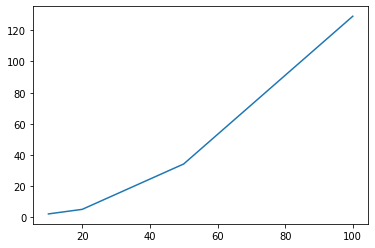

In [ ]:
tiempos = np.array([[10, 20, 50, 100],[2.25, 5.18, 34.28, 129.02]])
plt.plot(tiempos[0], tiempos[1]) 

In [ ]:
def image_to_number2(url):
  img = cv2.imread(url)
  # Channels
  redChannel=img[:,:,2]
  greenChannel=img[:,:,1]
  blueChannel=img[:,:,0]

  # number = np.mean((np.mean(redChannel), np.mean(greenChannel), np.mean(blueChannel)))
  #number = (np.mean(redChannel)*0.3) + (np.mean(greenChannel)*0.4) + (np.mean(blueChannel)*0.3)

  # Formula to determine perceived brightness of RGB color 
  # https://stackoverflow.com/questions/596216/formula-to-determine-perceived-brightness-of-rgb-color

  #number = (np.mean(redChannel)*0.2126) + (np.mean(greenChannel)*0.7152) + (np.mean(blueChannel)*0.0722)
  number = (np.mean(redChannel)*0.299) + (np.mean(greenChannel)*0.587) + (np.mean(blueChannel)*0.114)
  
  return number

In [ ]:
def luma(r,g,b):
  return (r*0.299) + (g*0.587) + (b*0.114)

In [ ]:
def sort_images(directory_arr):
  n = len(directory_arr)
  new_array = np.zeros(n)

  df = pd.DataFrame()
  df['image'] = directory_arr
  df['value'] = new_array
  for i in range(len(df)):
    df['value'][i] = image_to_number2(df['image'][i])
  
  return df.sort_values(by='value')

In [ ]:
imagenesConValores = sort_images(directory_arr)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [ ]:
len(imagenesConValores)

20

In [ ]:
def plot_images_luma(imagen, cols, imagenesConValores):
  maxCols = 500
  n = len(imagenesConValores)
  pixels = int(maxCols / cols)
  print(pixels)
  img = cv2.imread(imagen)
  output = resize(img, cols)

  totalArray = []
  for i in range(cols):
    arrayAux = []
    for j in range(cols):
      lumaNormalizado = luma(output[:,:,2][i][j], output[:,:,1][i][j], output[:,:,0][i][j]) / 255.0
      index = int(n*lumaNormalizado)
      arrayAux.append(resize(cv2.imread(imagenesConValores.iloc[index]['image']), pixels))

    Hori = np.concatenate(arrayAux, axis=1)
    totalArray.append(Hori)

  imgTotal = np.concatenate(totalArray, axis=0)
  cv2_imshow(imgTotal)

50


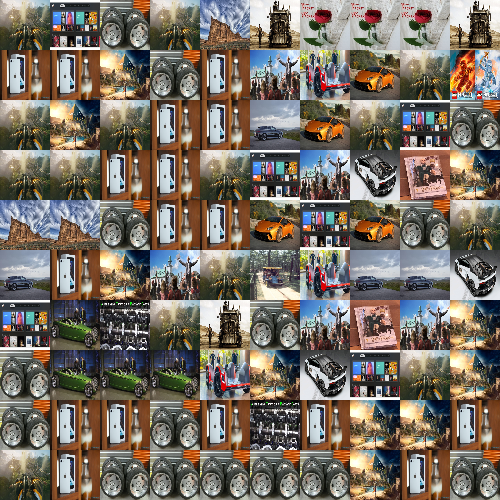

0.5697968006134033


In [ ]:
inicio = time.time()
plot_images_luma(imagen, 10, imagenesConValores)
fin = time.time()
print(fin-inicio)

25


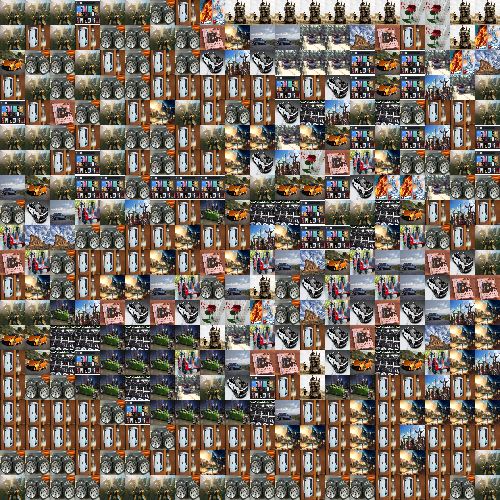

2.0712742805480957


In [ ]:
inicio = time.time()
plot_images_luma(imagen, 20, imagenesConValores)
fin = time.time()
print(fin-inicio)

10


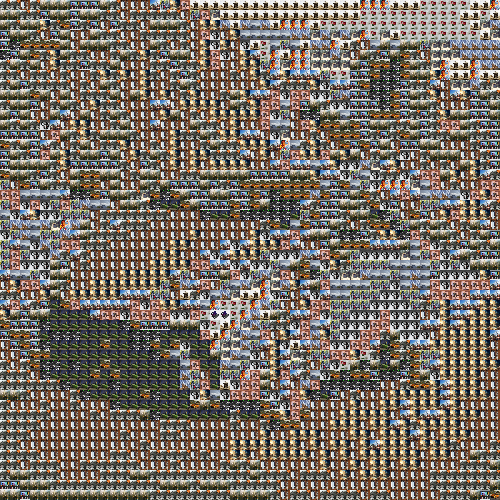

13.60040831565857


In [ ]:
inicio = time.time()
plot_images_luma(imagen, 50, imagenesConValores)
fin = time.time()
print(fin-inicio)

5


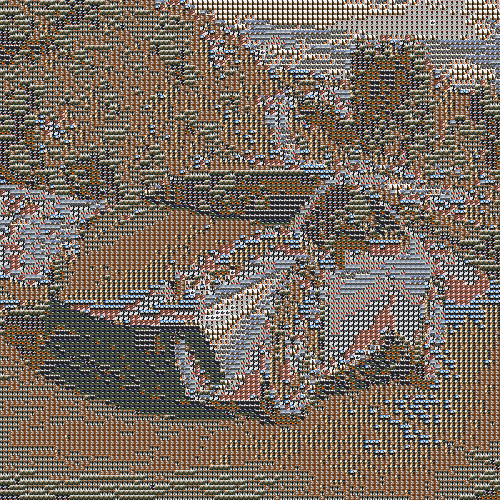

46.94521498680115


In [ ]:
inicio = time.time()
plot_images_luma(imagen, 100, imagenesConValores)
fin = time.time()
print(fin-inicio)

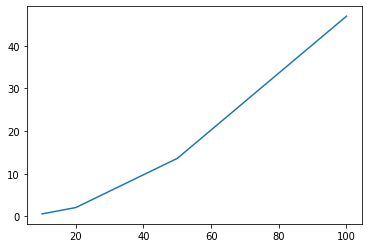

In [ ]:
tiempos = np.array([[10, 20, 50, 100],[0.57, 2.07, 13.6, 46.95]])
plt.plot(tiempos[0], tiempos[1]) 